The SIR model is a very simple model for an infective disease. Although it is far from being able to precisely predict the spread of viruses like Covid-19, it is not entirely useless to model a real disease outbreak.

## The Great Plague of London

A bubonic plague began in the city of London since 1665. The plague was later found to be caused by Yersinia Pestis bacteria, transmitted to human by the bite of fleas. The outbreak is now known as the *Great Plague of London*, the last major epidemic of to occur in England. In a span of 18 months, the plague killed an estimated 100,000 people, about a quarter of London's population.

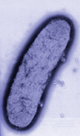

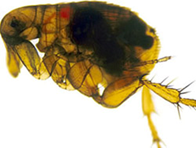

### The Eyam outbreak

We will focus on an endemic on a smaller scale in this notebook. In 1665, a bundle of flea-infested cloth was delivered to the Derbyshire village of *Eyam*, an English village near Sheffield, by the local tailor Alexander Hadfield. His assistant George Viccars opened up the bundle and released the fleas. Before long, poor George Viccars was dead, the disease spread and more began dying in the village.

The Rector *William Mompesson* took actions to slow the spread of the disease. Apart from the rearrangements of families and church services to allow for villagers to separate themselves, his best-known measure was to quarantine the entire Eyam village to prevent further spread of the disease into other areas. In the mean time, Mompesson recorded Infected, Susceptible and Recoverd/Dead populations as time progresses.

You can read more about this via

- [[https://en.wikipedia.org/wiki/Great_Plague_of_London]](https://en.wikipedia.org/wiki/Great_Plague_of_London)
- [[https://en.wikipedia.org/wiki/Eyam#1665_plague_outbreak]](https://en.wikipedia.org/wiki/Eyam#1665_plague_outbreak)

In [1]:
# import libraries for computation and graph plotting
import math
import matplotlib.pyplot as plt
import numpy as np

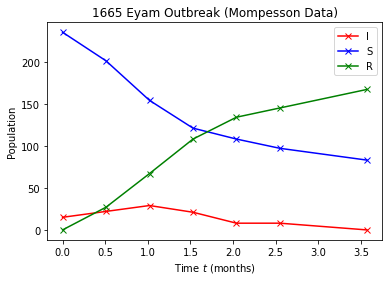

In [2]:
# Mompesson data
t_data = np.array([0, 0.51, 1.02, 1.53, 2.04, 2.55, 3.57])
I_data = np.array([15, 22, 29, 21, 8, 8, 0])
S_data = np.array([235, 201, 154, 121, 108, 97, 83])
R_data = I_data[0] + S_data[0] - I_data - S_data

plt.plot(t_data, I_data, '-x', label = "I" , color = 'red')
plt.plot(t_data, S_data, '-x', label = "S", color = 'blue')
plt.plot(t_data, R_data, '-x', label = "R", color = 'green')
plt.title(r'1665 Eyam Outbreak (Mompesson Data)')
plt.ylabel('Population')
plt.xlabel('Time $t$ (months)')
plt.xticks()
plt.yticks()
plt.legend()
plt.rcParams["figure.figsize"] = (10, 6)
plt.show()

### Fitting the Eyam data

Recall from last week our SIR equations for an infectious disease outbreak:

$$\begin{aligned}
\frac{\mathrm{d} S}{\mathrm{d} t} & = -\beta SI\\
\frac{\mathrm{d} I}{\mathrm{d} t} & = \beta SI - \gamma I\\
\frac{\mathrm{d} R}{\mathrm{d} t} & = \gamma I\\
\end{aligned}$$


The goal of this week's learning is to find the appropriate values for the infective rate $\beta$ and the recovery rate $\gamma$ for the Eyam outbreak, if the disease is to be modelled with the SIR equations.

Obviously, we hope that the predictions made by our model are as close as possible to the observed data. But it is practically impossible to have a perfect match between the predicted values and the observed values -- there is always some difference. So the idea is simple: we introduce an *error function*, and we choose the optimal parameters for our model such that the error function is *minimised*.

Since there are two parameters, $\beta$ and $\gamma$, to be determined, we will take a two-step routine to find their opmial values.

1. We first fix the ratio $\frac{\gamma}{\beta}$
2. Then we find optimal $\beta$ to minimise the error

### Step 1: Finding the optimal ratio $\frac{\gamma}{\beta}$

We can divide the first two SIR equations to find:

$$
\frac{\mathrm{d} I}{\mathrm{d} S} = -\frac{\beta SI - \gamma I}{\beta SI} = \frac{\gamma}{\beta}\frac{1}{S} - 1
$$

After separating the variables, we can integrate both sides to have:

$$
\int_{I_0}^{I} \mathrm{d} I = \int_{S_0}^{S}  \left( \frac{\gamma}{\beta}\frac{1}{S} - 1 \right) \mathrm{d} S \\
I - I_0 = \left( \frac{\gamma}{\beta} \ln S - S \right)\bigg|_{S_0}^{S}
$$

Rearrangement of the terms leads to:

$$ I_0 + S_0 -I - S = \frac{\gamma}{\beta} \ln\frac{S_0}{S} $$

Let's call $x=\ln\frac{S_0}{S}$ and $y = I_0 + S_0 -I - S$. The the equation above simply becomes

$$ y = \frac{\gamma}{\beta} x $$

Surely this is just the theory, but the SIR model implies that the cooked up variables $x$ and $y$ are sort of directly proportional to each other. This gives us a clear clue that we can plot a best fit line for the observed values and find the optimal value for the fitting gradient.

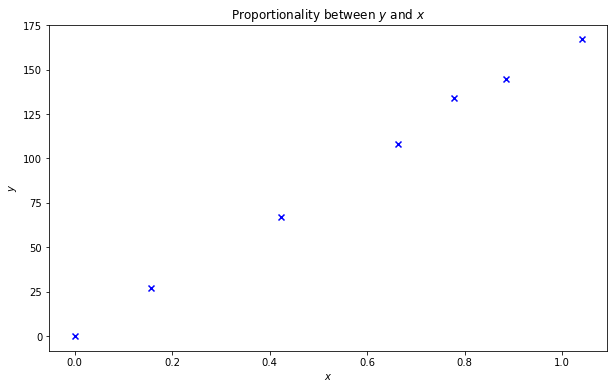

In [3]:
x_data = np.log(S_data[0]/S_data)
y_data = I_data[0] + S_data[0] - I_data - S_data

plt.scatter(x_data, y_data, marker='x', color='blue')
plt.title(r'Proportionality between $y$ and $x$')
plt.ylabel('$y$')
plt.xlabel('$x$')
plt.xticks()
plt.yticks()
plt.show()

### Mathematical Interlude for Step 1: Linear Regression

The most widely used method to fit a linear relationship between two set of variables, say ${x_i}$ and ${y_i}$, is the **linear regression** model.

Suppose $y$ is directly proportional to $x$, which we can express as $y = \alpha x$, then our goal is to find the value of $\alpha$ such that the collection of the predicted values ${\alpha x_i}$ are closest to the observed values ${y_i}$.

We can quantify the deviation of the predictors from the observations by considering **sum of square differences**. Explicitly, we introduce the error function:

$$ J = \frac{1}{2} \sum_i (\alpha x_i - y_i)^2 $$

The difference between the predicted value and the true value is squared because we do not want positive and negative errors to cancel out. The factor of $\frac{1}{2}$ is included as a matter of convenience for further calculations.

To minimise the error function, we set $\frac{\mathrm{d} J}{\mathrm{d}\alpha} = 0$:

$$ \frac{\mathrm{d} J}{\mathrm{d}\alpha} = \sum_i (\alpha x_i - y_i)x_i = \alpha \sum_i x_i^2 - \sum_i x_i y_i = 0 $$

which leads to

$$ \alpha = \frac{\overline{xy}}{\overline{x^2}}  \qquad \text{where } \overline{x^2} = \frac{1}{n} \sum_i x_i^2, \; \overline{xy} = \frac{1}{n} \sum_i x_i y_i$$

This gives the optimal value for the proportionality constant $\alpha$ that best fits the data.

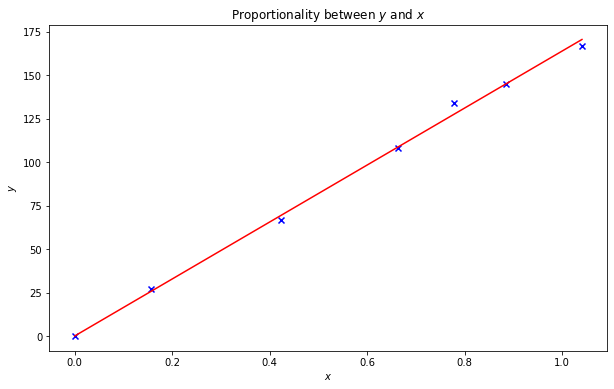

Gradient of best fit: α = 163.929


In [4]:
# linear regression model for direct proportional relationships
def bestfit(x, y):
    # compute line of best fit
    xybar = np.mean(x*y)
    xxbar = np.mean(x**2)
    alpha = xybar/xxbar
    y_fit = alpha * x
    x_fit = x

    # return outputs
    return x_fit, y_fit, alpha

# fitting x_data and y_data
x_fit, y_fit, alpha = bestfit(x_data, y_data)
plt.scatter(x_data, y_data, marker='x', color='blue')
plt.plot(x_fit, y_fit, color='red')
plt.title(r'Proportionality between $y$ and $x$')
plt.ylabel('$y$')
plt.xlabel('$x$')
plt.xticks()
plt.yticks()
plt.show()

print('Gradient of best fit: α = {:.3f}'.format(alpha))

### Step 2: Finding the optimal $\gamma$

Once we have fit $ y = \alpha x $ where $\alpha = \frac{\gamma}{\beta} \approx 163.93$, $\beta$ is tied to $\gamma$ so there is only one free parameter to work with. Let $\gamma$ be our free variable and we shall find its optimal value.

For a given set of initial conditions and a specific choice of $\gamma$, we can adopt the SIR model to make predictions on the size of the three groups $S$, $I$ and $R$ for any later times. In particular, we shall focus on the predicted values for $S$, $I$ and $R$ where real data are available, so we can compare and conclude how the model works. By spirit of the method of least squares, we can similarly introduce an error function:

$$
J = \frac{1}{2}\sum_i\left[ (S_\text{model, i} - S_\text{obs, i})^2 + (I_\text{model, i} - I_\text{obs, i})^2 + (R_\text{model, i} - R_\text{obs, i})^2\right]
$$

Since there is no simple analytical solutions to the SIR equations, so we do not have a straightforward algorithm to find the best fitting $\gamma$ like what we had for the simple linear regression case. What we are going to do is to let $\gamma$ run through a range of values. For each value of $\gamma$, we compute the outcomes of SIR equations numerically. We plug those into the error functions and get an estimate of how good or bad the model fits. For each value of $\gamma$, we will get a result. Then we can compare all these results. The one with the best performance stands out to be our optimal choice.

In [5]:
# SIR model implementation from last week
# return values of S, I and R for a time series
def SIR_model(init_values, t, beta, gamma):
    S = np.zeros_like(t)
    I = np.zeros_like(t)
    R = np.zeros_like(t)
    S[0], I[0], R[0] = init_values
    
    N = sum(init_values)
    step = t[1] - t[0]

    for i in range(1, len(t)):
        if I[i-1] + (beta * S[i-1] * I[i-1] - gamma * I[i-1]) * step > N:
            I[i] = N
            S[i] = 0
        else:
            S[i] = S[i-1] - beta * S[i-1] * I[i-1] * step
            I[i] = I[i-1] + (beta * S[i-1] * I[i-1] - gamma * I[i-1]) * step
        R[i] = R[i-1] + gamma * I[i-1] * step

    return S, I, R

In [6]:
# finding the optimal value for gamma that minimises the error function
def gamma_fit(data, gamma_min, gamma_max, num_gamma, alpha):
    # setting up observed data and initial conditions
    t_data, S_data, I_data, R_data = data
    init_values = S_data[0], I_data[0], R_data[0]
    
    # end time for simulation depends on the last available data point
    tmax = t_data[-1]
    
    # initialising the time vector
    step = 0.1
    t = np.arange(0, tmax + step, step)
    
    # initialising a total number of num_gamma gamma's within the range [gamma_min, gamma_max]
    gammas = np.linspace(gamma_min, gamma_max, num_gamma)
    
    SSD = np.zeros(num_gamma)        # stores sum of square difference for each choice of beta
    SSD_min = math.inf               # stores the minimum value of SSD
    gamma_opt = 0                    # stores the optimal value for gamma
    
    # looping over the set of possible gamma's
    for i in range(num_gamma):
        beta =  gammas[i]/alpha
        S, I, R = SIR_model(init_values, t, beta, gammas[i])
        
        # size of observed data is less than size of predicted data
        # to make the two match, we linearly interpolate the observed data
        S_int = np.interp(t, t_data, S_data)
        I_int = np.interp(t, t_data, I_data)
        R_int = np.interp(t, t_data, R_data)
        
        # compute the SSD for this choice of gamma
        SSD[i] = np.sum((S - S_int)**2 + (I - I_int)**2 + (R - R_int)**2 )/2
        
        # check if this choice of gamma gives the smallest SSD
        if SSD[i] < SSD_min:
            SSD_min = SSD[i]
            gamma_opt = gammas[i]
    
    # plotting the trend curve of SSD against gamma
    plt.plot(gammas, SSD, '-', label = "SSD", color = [1,0,0] )
    plt.plot([gamma_opt], [SSD_min], 'x', label = "SSD min")
    plt.xlabel( r"$\gamma$");
    plt.ylabel( "Sum of Square Differences");
    plt.xticks()
    plt.yticks()
    plt.title(r"$\gamma \approx $" + str(np.around(gamma_opt,3)) + " for minimum SSD ")
    plt.grid(True)
    plt.show()
    
    return gamma_opt

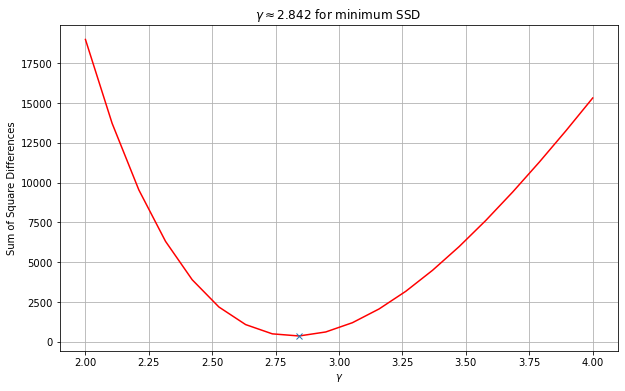

gamma = 2.842, beta = 0.01734


In [7]:
# first attempt to find the optimal gamma
data = [t_data, S_data, I_data, R_data]
gamma_min = 2
gamma_max = 4
num_gamma = 20
alpha = 163.929

gamma = gamma_fit(data, gamma_min, gamma_max, num_gamma, alpha)
beta = gamma/alpha
print("gamma = {:.3f}, beta = {:.5f}".format(gamma, beta))

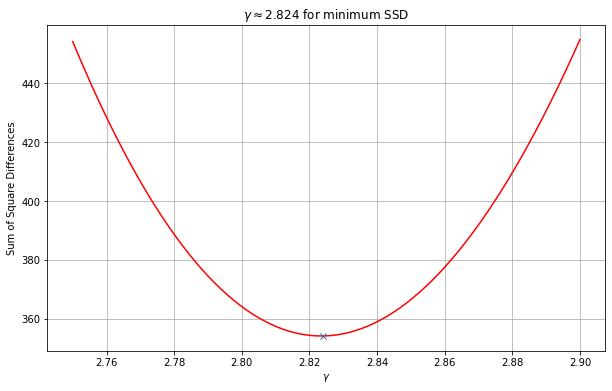

gamma = 2.824, beta = 0.01723


In [8]:
# refined search for optimal gamma
data = [t_data, S_data, I_data, R_data]
gamma_min = 2.75
gamma_max = 2.90
num_gamma = 80
alpha = 163.929

gamma = gamma_fit(data, gamma_min, gamma_max, num_gamma, alpha)
beta = gamma/alpha
print("gamma = {:.3f}, beta = {:.5f}".format(gamma, beta))

We performed two searches for the optimal value for $\gamma$: the first one as a coarse attempt to narraw down the searching range, followed by the second search at a higher precision.

Now that we know the optimal values for our SIR equations to model the Eyam outbreak, we can make a plot of the predicted spread of the disease and compare that with the Mompesson data on the same diagram.

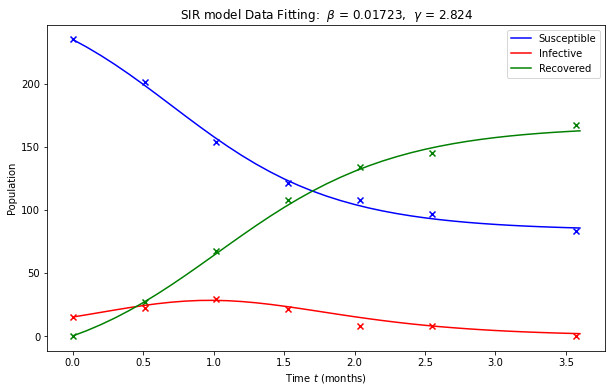

In [17]:
# plot the variation of S/I/R groups

# set up simulation time
tmax = t_data[-1]
step = 0.1
t = np.arange(0, tmax+step, step)

# set up initial values for SIR model
init_values = [S_data[0], I_data[0], R_data[0]]

S, I, R = SIR_model(init_values, t, beta, gamma)

plt.plot(t, S, color = 'blue', label = 'Susceptible')
plt.plot(t, I, color = 'red', label = 'Infective')
plt.plot(t, R, color = 'green', label = 'Recovered')
plt.scatter(t_data, I_data, marker='x', color='red')
plt.scatter(t_data, S_data, marker='x', color='blue')
plt.scatter(t_data, R_data, marker='x', color='green')
plt.title(r'SIR model Data Fitting:  $\beta$ = ' + '{:.5f}'.format(beta) + r',  $\gamma$ = ' + '{:.3f}'.format(gamma) )
plt.ylabel('Population')
plt.xlabel('Time $t$ (months)')
plt.xticks()
plt.yticks()
plt.legend()
plt.show()